# 1. ORM
---

Object-Relational Mapping (ORM) is a technique that lets you query and manipulate data from a database using an object-oriented paradigm. 

When most people say “ORM” they are referring to the **library** that implements this technique. 

Whichever ORM library you choose, they all use the same principles. There are a lot of ORM libraries around here:

- Java: [Hibernate](https://en.wikipedia.org/wiki/Hibernate_(framework)).
- PHP: Propel or Doctrine (I prefer the last one).
- Python: the Django ORM or SQLAlchemy (My favorite ORM library ever).
- C#: NHibernate or Entity Framework

至于Library和Framework, 不用那么在意, 知道一点区别就行了, 比如JQuery就是Library(就实现了一些功能封装成代码让你用), 而Spring那样的集成了什么tomcat之类的东西就属于框架. 

# 2. JDBC vs MySQL Connector
----

Sometimes, I always mistake MySQL driver for JDBC, a little funny, Lol. As mentioned above, JDBC is part of JDK, which is java's standard library, like code below`java.sql.*` belongs to **Java SE API**, which is also called **JDBC API**. 

So what is MySQL driver, like `com.mysql.cj.jdbc.Driver` which we often add dependency to our maven project. Actually `com.mysql.cj.jdbc.Driver` is **MySQL Connector**, and we don't use any of its code in our program, we just need to tell JDBC that which driver we use (`Class.forName("com.mysql.cj.jdbc.Driver");` ), and the `query` and `insert` statements are all executed by JDBC API (JDBC will commucate with mysql database with **MySQL Connector**), 

After look at these codes below, you will understand,

`Database.java`:
```java
package database;
import java.sql.Connection;
import java.sql.SQLException;

public interface Database {
    public Connection connect() throws SQLException;
}
```

`MysqlDatabase.java`:
```java
package database;

// java.sql.* 属于Java SE API, 这就是JDBC API
import java.sql.Connection;
import java.sql.DriverManager;
import java.sql.SQLException;

public class MysqlDatabase implements Database{
    private final String url, user, password;

    public MysqlDatabase(String url, String user, String password) {
        this.url = url;
        this.user = user;
        this.password = password;
    }

    @Override
    public Connection connect() throws SQLException {
        try {
            // You must load jdbc driver, otherwise you will get null for connection.
            Class.forName("com.mysql.cj.jdbc.Driver");
        } catch (ClassNotFoundException e) {
            // Instead of printing error simply, you should do some logging here
            System.err.println("Cannot find sql drive: com.mysql.jdbc.Driver");
            return null;
        }
        return DriverManager.getConnection(this.url, this.user, this.password);
    }
}
```

`GetTemperatureServlet.java`

```java
...
    public Connection getConnection() {
        Database database = new MysqlDatabase("jdbc:mysql://localhost:3306/greenhouse", "root", "778899");
        Controller controller = new Controller(database);
        Connection conn = null;
        try {
            conn = controller.getConnection();
        } catch (SQLException e) {
            logger.error(e.getMessage());
        }
        return conn;
    }

    public JsonArray getData(String sql, HttpServletResponse response) throws IOException {
        ResultSet resultSet = null;
        PreparedStatement statement = null;
        ArrayList<DataEntity> results = new ArrayList<>();
        Connection conn = getConnection();

        try {
            statement = conn.prepareStatement(sql);
            resultSet = statement.executeQuery();
            while (resultSet.next()) {
                results.add(new DataEntity(resultSet.getDouble(1), resultSet.getDate(2).toString()));
            }
        } catch (SQLException e) {
            ...
        }

        Gson gson = new Gson();
        JsonElement jsonElement = gson.toJsonTree(results, new TypeToken<ArrayList<DataEntity>>(){}.getType());
        ...
    }

```

As code above, `ResultSet`, `PreparedStatement` and `Connection` they are all belong to `java.sql.*` which is part of **java se api**, namely, **JDBC**. So now you know that we don't commucate with MySQL database with **MySQL Connector** directly, actually, we conmmucate with MySQL(retrive & insert data) with JDBC API(`java.sql.*`) and JDBC API commucate with **MySQL Connector**, and MySQL COnnector commucate with MySQL database. 

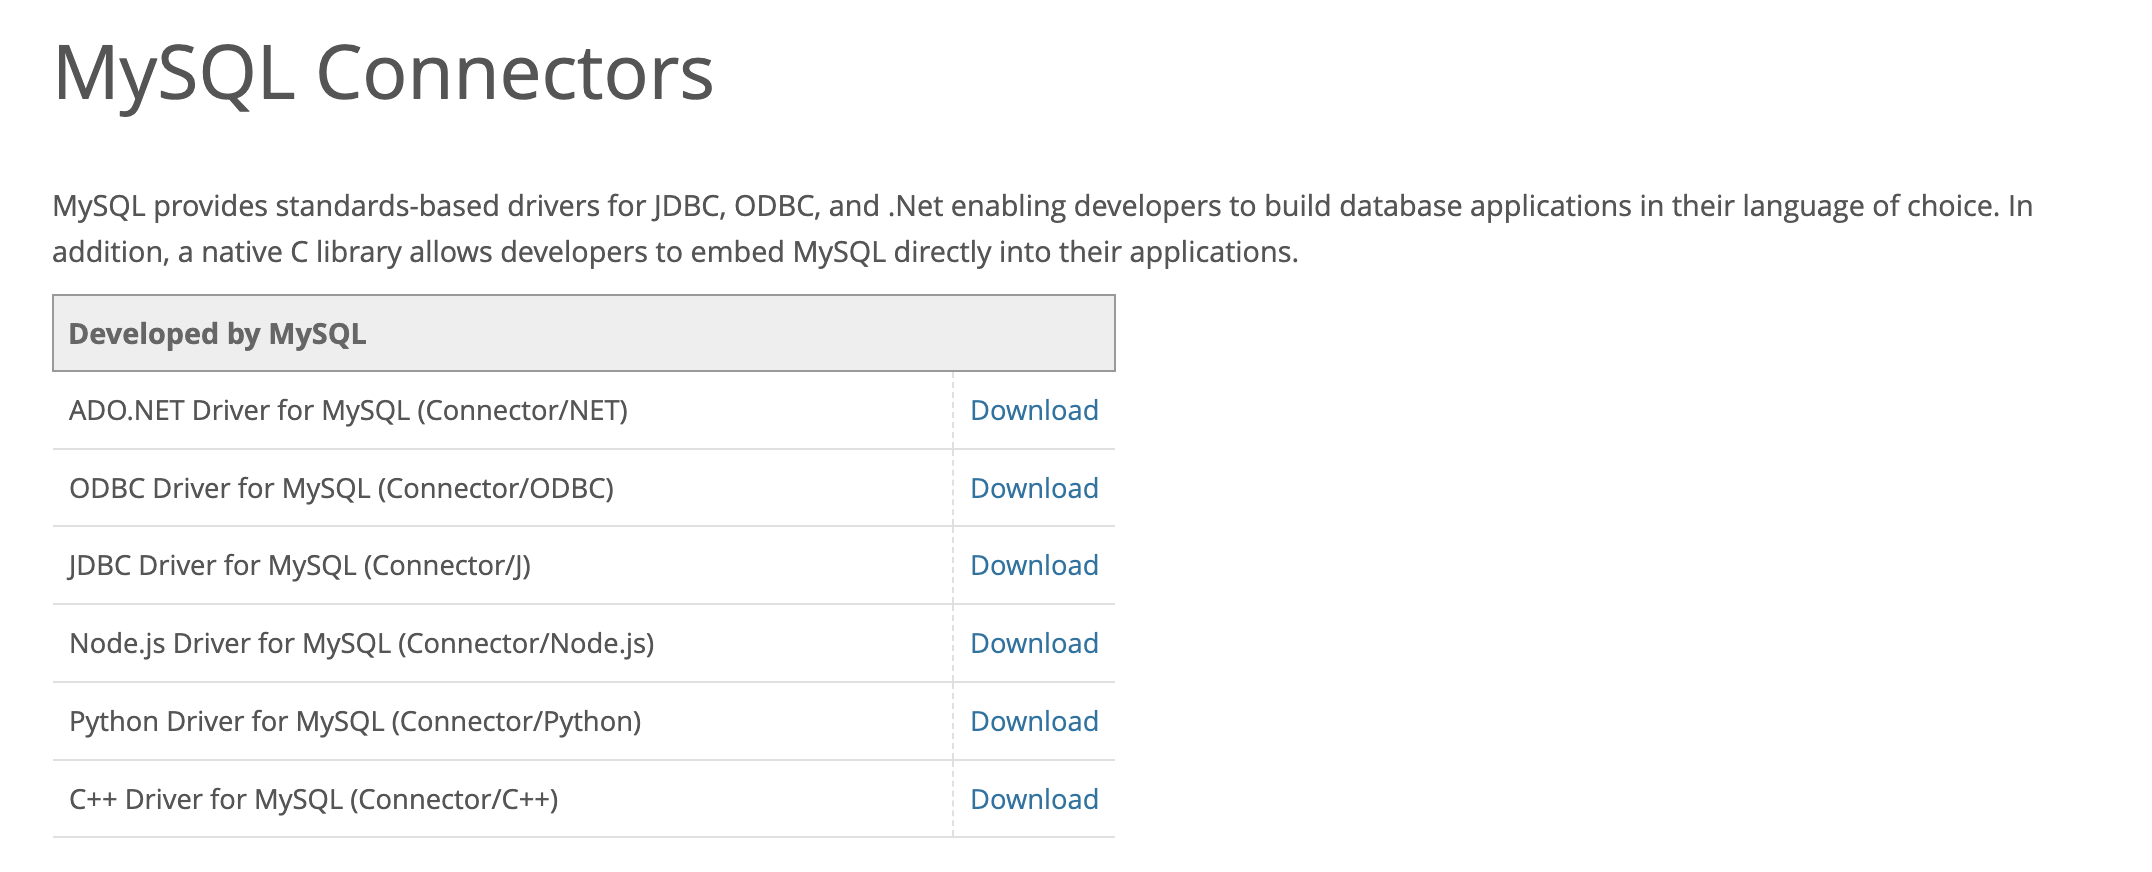

# 3. JPA vs JDBC
----

- JDBC is a standard for Database Access
- JPA is a standard for ORM

We have known what is JDBC in the paragraph above, let's look at wjat is JPA. 

JPA is a standard for Object Relational Mapping (ORM). This is a technology which allows you to map between **objects** in code and **database tables**. This can **hide** the SQL from the developer so that all they deal with are Java classes, and the provider allows you to save them and load them magically.  Mostly, XML mapping files or annotations on getters and setters can be used to tell the JPA provider which fields on your object map to which fields in the DB. The most famous JPA provider is [Hibernate](https://hibernate.org/), so it's a good place to start for concrete examples.

> Under the hood, Hibernate and most other providers for JPA write SQL and use JDBC to read and write from and to the DB.

所以JPA只是个Java的ORM标准, 而Hibernate实现了JPA, 

[java - JPA or JDBC, how are they different? - Stack Overflow](https://stackoverflow.com/questions/11881548/jpa-or-jdbc-how-are-they-different)


# 4. JPA vs Hibernate
----

所以JPA只是个Java的ORM标准, 而Hibernate实现了JPA, 

By itself, JPA is not a tool or framework; rather, it defines a set of concepts that guide implementers. Think of JPA as the guidelines that must be followed or an interface, while Hibernate's JPA implementation is code that meets the API as defined by the JPA specification and provides the under the hood functionality.

Think of JPA as the guidelines that must be followed or an interface, while Hibernate's JPA implementation is code that meets the API as defined by the JPA specification and provides the under the hood functionality.

When you use Hibernate with JPA you are actually using the Hibernate JPA implementation. The benefit of this is that you can swap out Hibernate's implementation of JPA for another implementation of the JPA specification. When you use straight Hibernate you are locking into the implementation because other ORMs may use different methods/configurations and annotations, therefore you cannot just switch over to another ORM.

[java - What's the difference between JPA and Hibernate? - Stack Overflow](https://stackoverflow.com/questions/9881611/whats-the-difference-between-jpa-and-hibernate)

[TothoughtBlogWeb](http://tothought.com/post/2)